# T10 - Tips and tricks

This tutorial contains suggestions that aren't essential to follow, but which may make your life easier.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/institutefordiseasemodeling/covasim/HEAD?urlpath=lab%2Ftree%2Fdocs%2Ftutorials%2Ftut_tips.ipynb) to open an interactive version of this notebook.
    
</div>

## Getting help

In addition to the docs (yes, you're reading them as we speak, well done), you can get help within Covasim. You can even search for a string in Covasim's source code. Curious to know where binomial distributions are used? You can do:

In [1]:
import covasim as cv
cv.options(jupyter=True)
cv.help('binomial', source=True)

Covasim 3.1.4 (2022-10-22) — © 2020-2022 by IDM
Found 16 matches for "binomial" among 112 available functions:
                     People:  6 matches
               binomial_arr:  3 matches
            binomial_filter:  3 matches
            contact_tracing:  1 matches
  historical_vaccinate_prob:  3 matches
            historical_wave:  1 matches
                  make_pars:  1 matches
       make_random_contacts:  2 matches
               make_randpop:  1 matches
                 n_binomial:  3 matches
             n_neg_binomial:  5 matches
                     sample:  5 matches
             simple_vaccine:  1 matches
                  test_prob:  1 matches
              vaccinate_num:  1 matches
             vaccinate_prob:  1 matches



You can also get a detailed view of the options with `cv.options.help(detailed=True)`, or more concise ones with `cv.options.help()` or `cv.options.disp()`:

In [2]:
cv.options.disp()

Covasim options (see also cv.options.help()):
         verbose: 0.1
           style: 'covasim'
             dpi: 72
            font: ['sans-serif']
        fontsize: 10
     interactive: True
         jupyter: True
            show: 1
           close: 0
       returnfig: False
         backend: 'module://matplotlib_inline.backend_inline'
              rc: {'axes.axisbelow': True,
                   'axes.facecolor': '#f2f2ff',
                   'axes.grid': True,
                   'axes.spines.right': False,
                   'axes.spines.top': False,
                   'figure.facecolor': 'white',
                   'font.family': 'Mulish',
                   'grid.color': 'white',
                   'grid.linewidth': 1,
                   'legend.frameon': False}
        warnings: 'warn'
             sep: ','
       precision: 32
  numba_parallel: 'none'
     numba_cache: True



## Versioning

Covasim contains a number of built-in tools to make it easier to keep track of where results came from. The simplest of these is that if you save an image using `cv.savefig()` instead of `pl.savefig()`, it will automatically store information about the script and Covasim version that generated it:

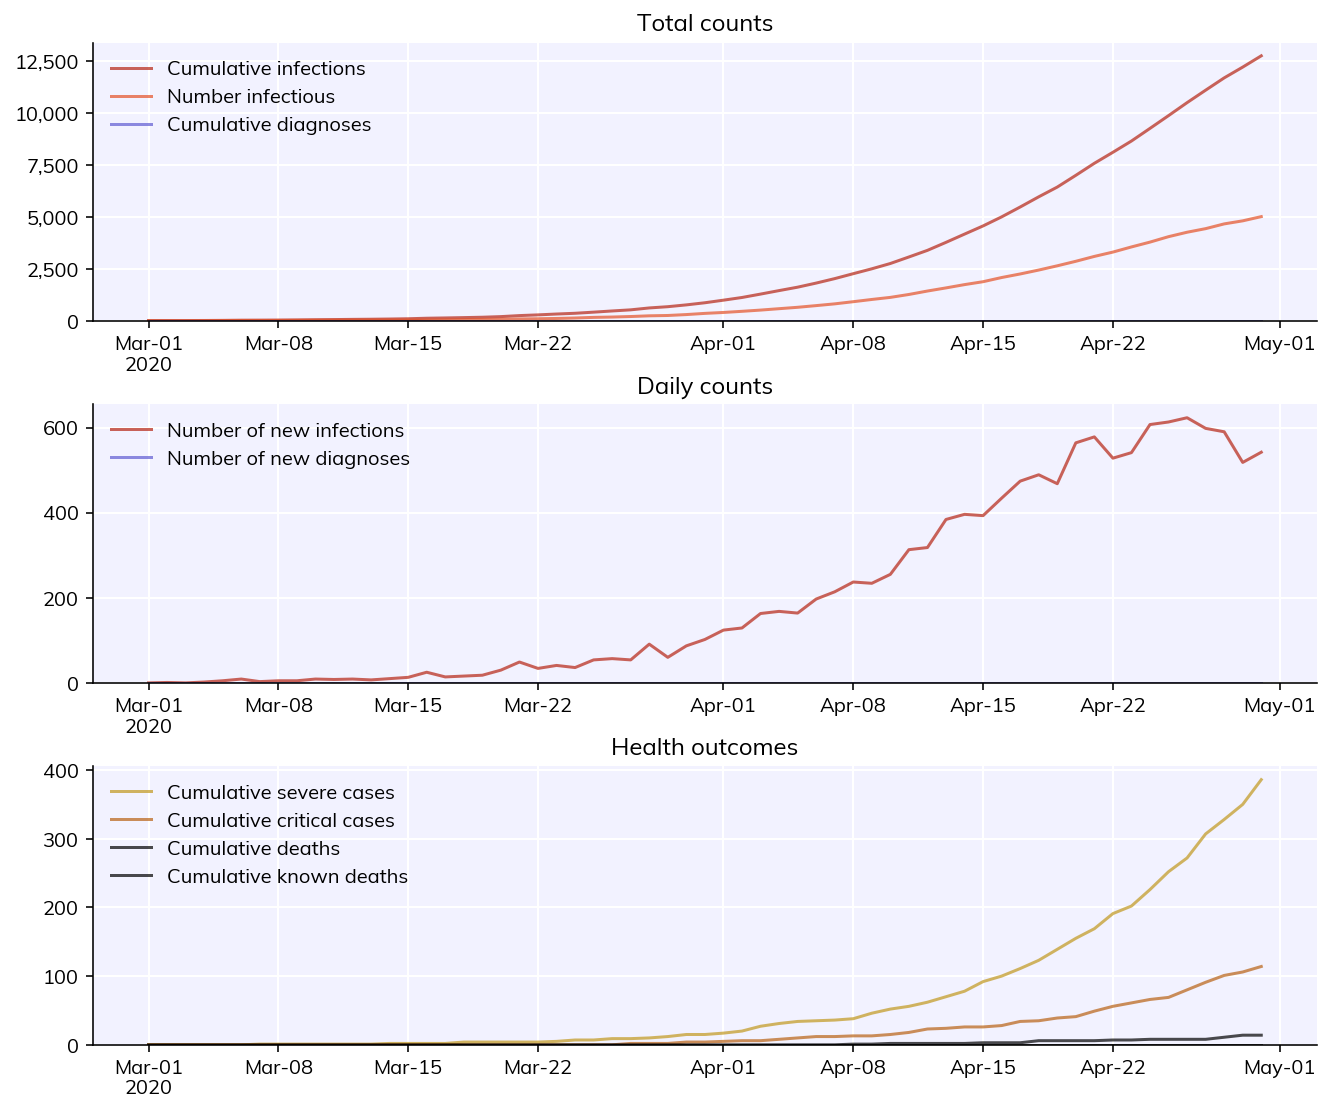

In [3]:
import covasim as cv
cv.options(jupyter=True, verbose=0)

sim = cv.Sim()
sim.run()
sim.plot()

In [4]:
filename = 'my-figure.png'
cv.savefig(filename) # Save including version information
cv.get_png_metadata(filename) # Retrieve and print information

Covasim version: 3.1.4
Covasim branch: Branch N/A
Covasim hash: Hash N/A
Covasim date: Date N/A
Covasim caller branch: Branch N/A
Covasim caller hash: Hash N/A
Covasim caller date: Date N/A
Covasim caller filename: /Users/erinstafford/opt/anaconda3/lib/python3.9/site-packages/covasim/misc.py
Covasim current time: 2023-Mar-10 13:22:27
Covasim calling file: /var/folders/v4/9_v3y8qx7lvdyy9kw19dbfzm0000gn/T/ipykernel_95353/2013902684.py


<Figure size 432x288 with 0 Axes>

This can be extremely useful for figuring out where that intriguing result you generated 3 weeks ago came from!

This information is also stored in sims and multisims themselves:

In [5]:
print(sim.version)
print(sim.git_info)

3.1.4
{'covasim': {'version': '3.1.4', 'branch': 'Branch N/A', 'hash': 'Hash N/A', 'date': 'Date N/A'}, 'called_by': {'branch': 'Branch N/A', 'hash': 'Hash N/A', 'date': 'Date N/A', 'filename': '/var/folders/v4/9_v3y8qx7lvdyy9kw19dbfzm0000gn/T/ipykernel_95353/3079231718.py'}}


Finally, the function `cv.check_version()` and `cv.check_save_version()` are useful if you want to ensure that users are running the right version of your code. Placing `cv.check_save_version('2.0.0')` will save a file with the information above to the current folder – again, useful for debugging exactly what changed and when. (You can also provide additional information to it, e.g. to also save the versions of 3rd-party packages you're importing). `cv.check_version()` by itself can be used to provide a warning or even raise an exception (if `die=True`) if the version is not what's expected:

In [6]:
cv.check_version('1.5.0')

Note: Covasim is newer than expected (3.1.4 vs. 1.5.0)


1

## Working with dates

Dates can be tricky to work with. Covasim comes with a number of built-in features to work with dates. By default, by convention Covasim works with dates in the format `YYYY-MM-DD`, e.g. `'2020-12-01'`. However, it can handle a wide variety of other date and `datetime` objects. In particular, `sim` objects know when they start and end, and can use this to do quite a bit of date math:

In [7]:
sim = cv.Sim(start_day='20201122', end_day='2020-12-09 02:14:58.727703')
sim.initialize() # Date conversion happens on initialization
print(sim['start_day'])
print(sim['end_day'])
print(sim.day(sim['end_day'])) # Prints the number of days until the end day, i.e. the length of the sim

2020-11-22
2020-12-09
17


You can also easily calculate the difference between two dates, or generate a range of dates. These are returned as strings by default, but can be converted to datetime objects via Sciris:

In [8]:
import sciris as sc

print(cv.daydiff('2020-06-01', '2020-07-01', '2020-08-01'))
dates = cv.date_range('2020-04-04', '2020-04-12')
print(dates)
print(sc.readdate(dates))

[30, 31]
['2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12']
[datetime.datetime(2020, 4, 4, 0, 0), datetime.datetime(2020, 4, 5, 0, 0), datetime.datetime(2020, 4, 6, 0, 0), datetime.datetime(2020, 4, 7, 0, 0), datetime.datetime(2020, 4, 8, 0, 0), datetime.datetime(2020, 4, 9, 0, 0), datetime.datetime(2020, 4, 10, 0, 0), datetime.datetime(2020, 4, 11, 0, 0), datetime.datetime(2020, 4, 12, 0, 0)]


Finally, one gotcha is that when loading Excel spreadsheets in pandas, dates are loaded in pandas' internal `Timestamp[ns64]` format, which nothing else seems to be able to read. If this happens to you, the solution (as far as Covasim is concerned) is to convert to a `datetime.date`:

```python
data = pd.read_excel(filename)
data['date'] = data['date'].dt.date
```

## Working with dictionaries

"I already know how to work with dictionaries", you say. Yes, you do. But there are a couple tricks that might make things easier.

Covasim is built on Sciris, which includes containers `odict` and `objdict`. While these are [documented elsewhere](https://sciris.readthedocs.io/en/latest/_autosummary/sciris.sc_odict.odict.html#sciris.sc_odict.odict), a couple examples will serve to illustrate how they work.

An `odict` is just an ordered dict that you can refer to by *position* as well as by key. For example:

In [9]:
mydict = sc.odict(foo=[1,2,3], bar=[4,5,6]) # Assignment is the same as ordinary dictionaries
print('Entry foo:', mydict['foo'])
print('Entry 0:',    mydict[0]) # Access by key or by index
for i,key,value in mydict.enumitems(): # Additional methods for iteration
    print(f'Item {i} is named {key} and has value {value}')

Entry foo: [1, 2, 3]
Entry 0: [1, 2, 3]
Item 0 is named foo and has value [1, 2, 3]
Item 1 is named bar and has value [4, 5, 6]


An `objdict` is exactly the same as an odict except it lets you reference keys as if they were attributes:

In [10]:
myobjdict = sc.objdict(foo=[1,2,3], bar=[4,5,6])
print('Entry foo:', myobjdict['foo'])
print('Entry 0:',    myobjdict[0]) # Access by key or by index
print('"Attribute" foo:', myobjdict.foo)

Entry foo: [1, 2, 3]
Entry 0: [1, 2, 3]
"Attribute" foo: [1, 2, 3]


Using this approach, you can get all the power and flexibility of dictionaries, while writing code as succinctly as possible. For example:

In [11]:
total_pop = 44_483 # This many total people

pars= sc.objdict(
    pop_type = 'hybrid',
    pop_size = 10e3,
)
pars.pop_scale = total_pop/pars.pop_size # Instead of pars['pop_scale'] = total_pop/pars['pop_size'] 
sim = cv.Sim(**pars) # It's still a dict, so you can treat it as one!

For example, the `results` object is an `objdict`. This means that although you can use e.g. `sim.results['new_infections']`, you can also use `sim.results.new_infections`.

Finally, Sciris also contains a function called `mergedicts`. This acts very similarly to `dict.update()`, with the main difference being that it returns the result of merging the two dictionaries. This is especially useful for handling keyword arguments in functions:

In [12]:
def myfunc(args=None, **kwargs):
    defaults = dict(foo=[1,2,3], bar=[4,5,6])
    merged_args = sc.mergedicts(defaults, args, kwargs)
    print(merged_args)

myfunc(args=dict(bar=18), other_args='can be anything')

{'foo': [1, 2, 3], 'bar': 18, 'other_args': 'can be anything'}


As you can see, it merged the default settings, the arguments supplied to the function via the keyword `args`, and then other keywords, into a single dictionary.